Notebook to test image convolution, loading, transforms, etc

In [144]:
import numpy as np
import os
from PIL import Image, ImageOps
from matplotlib import pyplot as plt
from scipy import signal

In [145]:
# print list of available images
path = '/Users/harrisonward/Desktop/CS/Git/pixelator/assets'
for file in os.listdir(path):
    fname, ftype = file.split('.')
    if fname != '' and ftype == 'jpeg':
        print(file)

IMG_2012.jpeg
IMG_8737.jpeg
IMG_8740.jpeg
_DSC6014.jpeg
FullSizeRender.jpeg


In [156]:
# store lazily rendered images
images = []
for file in os.listdir(path):
    fname, ftype = file.split('.')
    if fname != '' and ftype == 'jpeg':
        print(Image.open(f'{path}/{file}').size)
        images.append(Image.open(f'{path}/{file}'))

(4032, 3024)
(798, 1081)
(879, 933)
(6336, 9504)
(3024, 4032)


In [147]:
# convert images to normed numpy arrays
image_arrays = []
for image in images:
    print(image.size)
    gray_array = np.mean(np.asarray(image), axis=2)
    image_arrays.append(gray_array)

(4032, 3024)
(798, 1081)
(879, 933)
(6336, 9504)
(3024, 4032)


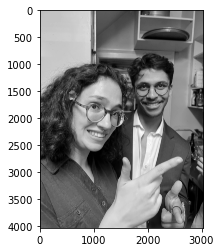

In [148]:
# plot test image
test_img = image_arrays[0].T
plt.imshow(test_img, cmap='gray');

Split image in to tiles

In [149]:
img_size = img.shape
W, H = img_size

def tiler(n_cols, W, H, scale):
    # tile width
    w = W / n_cols

    # tile height 
    h = w/scale

    n_rows = H//h

    print(f"cols: {n_cols}, rows: {n_rows}")
    print(f"tile dims: {w} x {h}")
 
    # check if image size is too small
    if n_cols > W or n_rows > H:
        print("Image too small for specified cols!")
    
    return n_rows

tiler(100, W, H, 0.43)

cols: 100, rows: 32.0
tile dims: 40.32 x 93.76744186046511


32.0

Find average brightness

In [150]:
def avg_brightness(img_array):
    return np.average(img_array, axis=None)


In [151]:
gscale1 = "$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~<>i!lI;:,\"^`'. "

In [152]:
def getAverageL(image):
 
    """
    Given PIL Image, return average value of grayscale value
    """
    # get image as numpy array
    im = np.array(image)
 
    # get shape
    w,h = im.shape
 
    # get average
    return np.average(im.reshape(w*h))

Convert to ASCII

In [153]:
def img_to_ascii(input_image, n_cols, scale):
    output_image = []
    
    W, H = input_image.size[0], input_image.size[1]
    
    # tile width
    w = W / n_cols

    # tile height 
    h = w / scale

    n_rows = int(H/h)

    print(f"cols: {n_cols}, rows: {n_rows}")
    print(f"tile dims: {w} x {h}")
 
    # check if image size is too small
    if n_cols > W or n_rows > H:
        print("Image too small for specified cols!")

    for i in range(n_rows):
        
        # pixel number times tile height
        y1 = int(i * h)
        
        # pixel one to the right
        # could probably add a % to handle the wrap around
        y2 = int((i+1)*h)

        if i == n_rows - 1:
            y2 = H

        # add an empty string 
        output_image.append("")

        for j in range(n_cols):
            # x tile is the pixel number times the tile width
            x1 = int(j*w)
            x2 = int((j+1)*w)

            if i == n_cols - 1:
                x2 = W
            
            # crop the image, get the tile 
            # could also take a slice of the matrix at these indicies
            img = input_image.crop((x1, y1, x2, y2))

            # get the average brightness
            # avg = int(avg_brightness(img))
            avg = int(getAverageL(img))

            # look up ascii char
            gsval = gscale1[int((avg*69)/255)]

            # append the char 
            output_image[i] += gsval
    
    return output_image


Wrap the Functions

In [154]:
def main(image, n_cols, scale):
    output_image = img_to_ascii(image, n_cols, scale)
    
    print('generating ASCII art...')
    
    # convert image to ascii txt
    outFile = 'out.txt'
 
    # open file
    f = open(outFile, 'w')
 
    # write to file
    for row in output_image:
        f.write(row + '\n')
 
    # cleanup
    f.close()
    print("ASCII art written to %s" % outFile)

In [162]:
a = images[1].convert('L')

In [166]:
main(a, n_cols=600, scale=0.43)

cols: 600, rows: 349
tile dims: 1.33 x 3.0930232558139537
generating ASCII art...
ASCII art written to out.txt
